In [49]:
# Packages

import pandas as pd
import pickle
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import shutil
import re

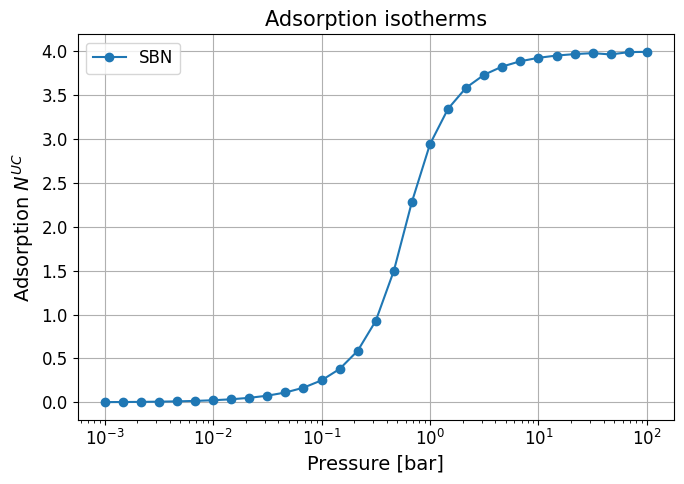

In [50]:
data = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/isotherm_300K/2025_10_13_DB_100Bins_64grid_isotherme.csv")

structures = ["SBN"]#, "DFT", "MWF", "PAU", "PWN", "BCT"]
#structures = data["structure_name"].unique()

plt.figure(figsize=(7, 5))

for structure in structures:
# Daten für diese Struktur filtern
    df_sel = data[data["structure_name"] == structure]
    df_sel = df_sel.sort_values("pressure_bar")
    plt.plot(df_sel["pressure_bar"], df_sel["beladung_atoms"], marker="o", lw=1.5, label=structure)
    #plt.plot(df_sel["pressure_bar"], df_sel["beladung_atoms"]/df_sel["volume_kubAng"], marker="o", lw=1.5, label=structure)

    """for p in [0.1, 1, 5]:
        plt.axvline(p, linestyle="--", color="black", linewidth=1)
        plt.text(
            p,
            plt.ylim()[1]*0.9,
            f"{p} bar",
            rotation=90,
            verticalalignment="top",
            horizontalalignment="right",
            fontsize=9
        )"""
#plt.plot(df_sel["pressure_bar"], df_sel["beladung_mol_per_kg"], marker="o", lw=1.5)

plt.title(f"Adsorption isotherms")
plt.xlabel("Pressure [bar]")
plt.legend()
plt.ylabel("Adsorption $N^{UC}$")
plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.tight_layout()
save6 = False

if save6:
    plt.savefig("IsoPlot.png", dpi=300, bbox_inches="tight")
plt.show()

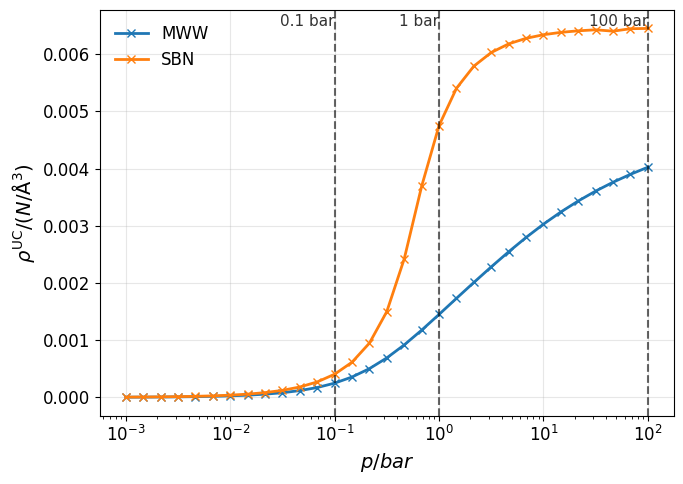

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load data ---
data = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/isotherm_300K/2025_10_13_DB_100Bins_64grid_isotherme.csv")
df = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/dft_data_temp_pressure_präsi_20bin_iso400.csv")
structures = ["MWW", "SBN"]#, "LIT", "EON", "YIF", "MWW"]

# --- Global scientific style ---
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 15,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6
})

plt.figure(figsize=(7, 5))

for structure in structures:
    df_sel = data[data["structure_name"] == structure].sort_values("pressure_bar")

    # Main isotherm
    plt.plot(
        df_sel["pressure_bar"],
        df_sel["beladung_atoms"]/ df_sel["volume_kubAng"],
        marker="x",
        label=structure
    )

# --- Evaluation pressures ---
eval_pressures = [0.1, 1.0, 100.0]

ymax = plt.ylim()[1]

for p in eval_pressures:
    plt.axvline(
        x=p,
        color="k",
        linestyle="--",
        alpha=0.6,
        linewidth=1.5
    )
    plt.text(
        p,
        ymax*0.99,
        f"{p:g} bar",
        rotation=0,
        va="top",
        ha="right",
        fontsize=11,
        alpha=0.8
    )

# --- Labels & figure styling ---
#plt.title("Adsorption Isotherms at 298K and 400K")
plt.xlabel("$p/bar$")
plt.ylabel(r"$\rho^{\mathrm{UC}}/(N/\mathrm{\AA}^{3})$")
plt.xscale("log")
plt.grid(alpha=0.3)
plt.legend(frameon=False)
plt.tight_layout()

# --- Save figure ---
plt.savefig("IsoPräsi5.png", dpi=400, bbox_inches="tight")
plt.show()



In [37]:
data = data[data["pressure_bar"]==1]
top_atoms = data.nlargest(5, "beladung_atoms")[["structure_name", "pressure_bar", "beladung_atoms"]]
top_mol   = data.nlargest(5, "beladung_mol_per_kg")[["structure_name", "pressure_bar", "beladung_mol_per_kg"]]

print("\nTop 5 nach Beladung_atoms:")
print(top_atoms)

print("\nTop 5 nach Beladung_mol_per_kg:")
print(top_mol)




Top 5 nach Beladung_atoms:
     structure_name  pressure_bar  beladung_atoms
1070            MWF           1.0      186.356472
1875            PAU           1.0       83.319670
5843            LTN           1.0       82.452086
4231            IMF           1.0       27.421751
3239            PWN           1.0       26.809209

Top 5 nach Beladung_mol_per_kg:
     structure_name  pressure_bar  beladung_mol_per_kg
7207            SBN           1.0             4.897143
4510            DFT           1.0             3.408096
1535            DOH           1.0             3.054484
2061            MTN           1.0             2.880422
2681            LIO           1.0             2.872610


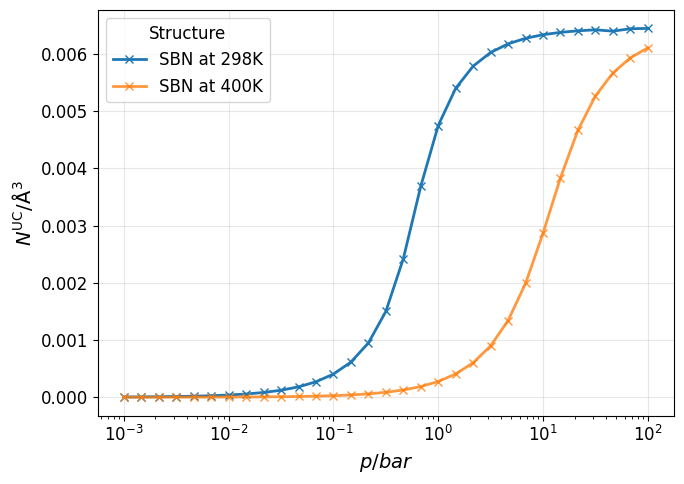

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load data ---
data_300 = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/isotherm_300K/2025_10_13_DB_100Bins_64grid_isotherme.csv")
data_400 = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/dft_data_temp_pressure_präsi_20bin_iso400.csv")

structures = ["SBN"]  # add more if you want

# --- Global scientific style (same as before) ---
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 15,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6
})

plt.figure(figsize=(7, 5))

# -------------------------------------------------
# Plot isotherms: keep previous look
# - same marker ("x")
# - same style overall
# - distinguish temperatures only by linestyle + subtle alpha
# -------------------------------------------------
for structure in structures:
    # --- 300 K (solid) ---
    df300 = data_300[data_300["structure_name"] == structure].sort_values("pressure_bar")
    if len(df300):
        plt.plot(
            df300["pressure_bar"],
            df300["beladung_atoms"] / df300["volume_kubAng"],
            marker="x",
            linestyle="-",
            label=f"SBN at 298K"
        )

    # --- 400 K (dashed, same marker, no extra legend entry) ---
    df400 = data_400[data_400["structure_name"] == structure].sort_values("pressure_bar")
    if len(df400):
        plt.plot(
            df400["pressure_bar"],
            df400["beladung_atoms"] / df400["volume_kubAng"],
            marker="x",
            linestyle="-",
            alpha=0.8,
            label="SBN at 400K"  # <- keeps legend clean like before
        )



# --- Labels & figure styling (same vibe, updated title) ---
#plt.title("Adsorption Isotherms at 298K and 400K")
plt.xlabel("$p/bar$")
plt.ylabel(r"$N^{\mathrm{UC}}/\mathrm{\AA}^{3}$")

plt.xscale("log")
plt.grid(alpha=0.3)
plt.legend(frameon=True, title="Structure")
plt.tight_layout()

# --- Save figure ---
plt.savefig("Iso_300K_400K_freshyfresh.png", dpi=400, bbox_inches="tight")
plt.show()
